Import packages/libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Creating the dataset

In [28]:
features, targets = make_classification(n_samples = 150, n_features = 2, n_informative = 1, n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=1)

In [30]:
df = pd.DataFrame(data=X_train, columns=['x1', 'x2'])
df['targets'] = y_train
df.head()

,x1,x2,targets
0,1.012528,-2.793085,1
1,1.026721,-0.606998,1
2,0.989421,0.825030,1
3,-0.748664,-1.331952,0
4,-0.865423,2.186980,0


Visualize the dataset

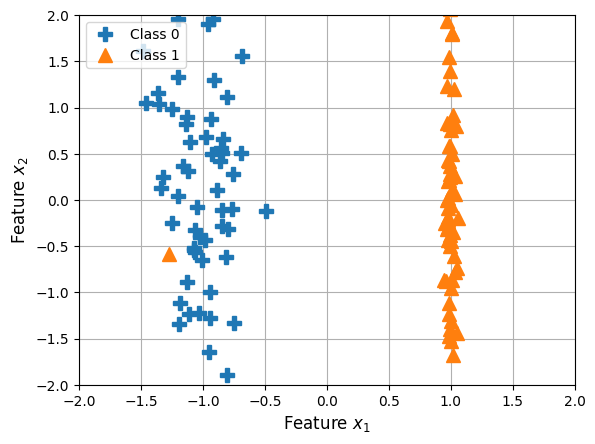

In [31]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'

)

plt.plot(
     X_train[y_train == 1, 0],
     X_train[y_train == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 2)

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

Create the perceptron

In [32]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        # Updating the weights
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

Train the Model

In [33]:
def train(model, X_train, y_train, epochs):
    # Training Loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

Create a perceptron

In [34]:
ppn = Perceptron(num_features = 2)
train(ppn, X_train, y_train, epochs = 5)

Epoch 1 errors 6
Epoch 2 errors 2
Epoch 3 errors 1
Epoch 4 errors 3
Epoch 5 errors 3


Evaluate the model

In [35]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [36]:
train_acc = compute_accuracy(ppn, X_train, y_train)
print("Model Accuracy:", train_acc)

Model Accuracy: 0.9916666666666667


Plot the Decision Boundry

In [37]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

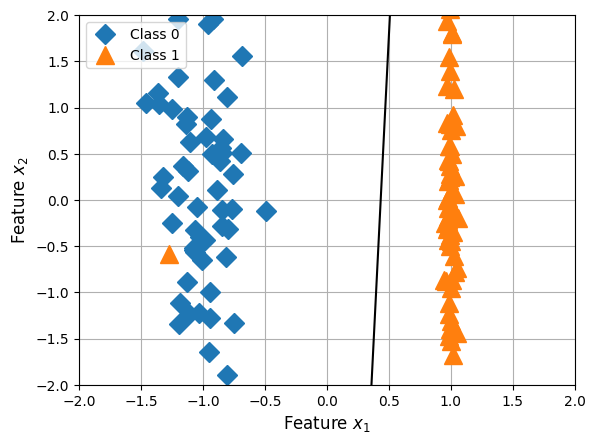

In [38]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [39]:
test_acc = compute_accuracy(ppn, X_test, y_test)
print("Model Accuracy:", test_acc)

Model Accuracy: 1.0
